In [38]:
# get hazard object
import numpy as np
from climada.hazard import Hazard, Centroids
from climada.test import get_test_file

haz_tc_fl = Hazard.from_hdf5(
    get_test_file("HAZ_DEMO_FL_15")
) 
haz_tc_fl.check()

In [2]:
# compute local exceedance instensity
test_return_periods = np.geomspace(1, 15, 20)
local_exceedance_intensity, _, _ = haz_tc_fl.local_exceedance_intensity(
    return_periods=test_return_periods, #method="extrapolate"# method="extrapolate_constant"
)

In [3]:
np.where(local_exceedance_intensity.values[:, 1:].max(axis=1) == np.sort(local_exceedance_intensity.values[:, 1:].max(axis=1))[-1])

(array([1319]),)

In [4]:
from return_period_maps import ReturnPeriodMap, ExceedanceCurve
rp_map = ReturnPeriodMap.from_CLIMADA_local_exceedance_intensity(local_exceedance_intensity)


In [5]:
rp_map.exceedance_curves[0].exceedance_frequencies[::-1]

array([0.06666667, 0.0768791 , 0.08865594, 0.10223683, 0.11789813,
       0.13595852, 0.15678553, 0.18080295, 0.20849952, 0.24043883,
       0.2772708 , 0.31974494, 0.36872554, 0.42520931, 0.49034562,
       0.56545994, 0.65208075, 0.7519707 , 0.86716244, 1.        ])

In [6]:
max_inds = [0, 1227, 1278] #[0,1227, 1278, 1277]
from convert_resolution import combine_exceedance_curves
agg_rp_curve = combine_exceedance_curves(
    [rp_map.exceedance_curves[i] for i in max_inds],
    value_resolution=10.,
    aggregation_method=sum,
    coincidence_fraction=1/100)

/var/folders/04/tbpkdd855mg6mjr2mj6h1csh0000gp/T/ipykernel_10467/1708701091.py:6: RuntimeWarning: divide by zero encountered in divide
  ax.plot(1/agg_rp_curve.exceedance_frequencies, agg_rp_curve.values, label='aggregated')


(0.5, 20.0)

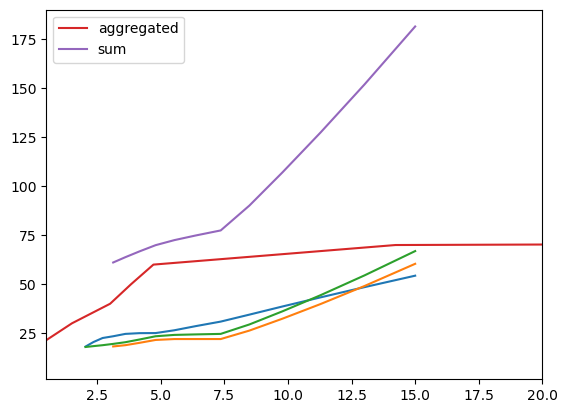

In [7]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
for i in max_inds:
    ax.plot(1/rp_map.exceedance_curves[i].exceedance_frequencies, rp_map.exceedance_curves[i].values)

ax.plot(1/agg_rp_curve.exceedance_frequencies, agg_rp_curve.values, label='aggregated')
ax.plot(1/rp_map.exceedance_curves[0].exceedance_frequencies, np.sum([rp_map.exceedance_curves[i].values for i in max_inds], axis=0), label='sum')
ax.legend()
ax.set_xlim(.5, 20)

In [8]:
print(rp_map.exceedance_curves[0].exceedance_frequencies[-2:])
freqs = np.diff(rp_map.exceedance_curves[0].exceedance_frequencies[::-1])[::-1]
freqs = np.insert(freqs, -1, rp_map.exceedance_curves[0].exceedance_frequencies[-1], -1)

[0.0768791  0.06666667]


In [9]:
rp_map.exceedance_curves[0].exceedance_frequencies

array([1.        , 0.86716244, 0.7519707 , 0.65208075, 0.56545994,
       0.49034562, 0.42520931, 0.36872554, 0.31974494, 0.2772708 ,
       0.24043883, 0.20849952, 0.18080295, 0.15678553, 0.13595852,
       0.11789813, 0.10223683, 0.08865594, 0.0768791 , 0.06666667])

In [10]:
1-(1-np.exp(- freqs)).sum()

0.036494241238875236

In [11]:
np.gradient(rp_map.exceedance_curves[0].exceedance_frequencies, rp_map.exceedance_curves[0].values/2)

array([        nan,         nan,         nan,         nan,         nan,
               nan, -0.05549577, -0.09296982, -0.09280221, -0.16654744,
       -1.26945126, -1.35778214, -0.03231295, -0.0203949 , -0.01496737,
       -0.00894696, -0.00672929, -0.00520679, -0.00402875, -0.00348953])

In [12]:
from utils import prob_from_exceedance_frequency, exceedance_frequency_from_prob
probs = prob_from_exceedance_frequency(exceedance_frequency=rp_map.exceedance_curves[0].exceedance_frequencies,coincidence_fraction=1)
probs

array([0.36787944, 0.0522626 , 0.05129454, 0.04952408, 0.04713814,
       0.0443159 , 0.04121827, 0.03798224, 0.03471907, 0.03151497,
       0.0284335 , 0.02551868, 0.02279837, 0.02028759, 0.01799145,
       0.01590776, 0.01402912, 0.01234468, 0.01084141, 0.00950518,
       0.06449301])

In [13]:
exceedance_frequency_from_prob(probs, coincidence_fraction=1)

array([1.        , 0.86716244, 0.7519707 , 0.65208075, 0.56545994,
       0.49034562, 0.42520931, 0.36872554, 0.31974494, 0.2772708 ,
       0.24043883, 0.20849952, 0.18080295, 0.15678553, 0.13595852,
       0.11789813, 0.10223683, 0.08865594, 0.0768791 , 0.06666667])

In [14]:
rp_map.exceedance_curves[0].exceedance_frequencies

array([1.        , 0.86716244, 0.7519707 , 0.65208075, 0.56545994,
       0.49034562, 0.42520931, 0.36872554, 0.31974494, 0.2772708 ,
       0.24043883, 0.20849952, 0.18080295, 0.15678553, 0.13595852,
       0.11789813, 0.10223683, 0.08865594, 0.0768791 , 0.06666667])

In [15]:
max_inds = [0,1227, 1278, 1277]

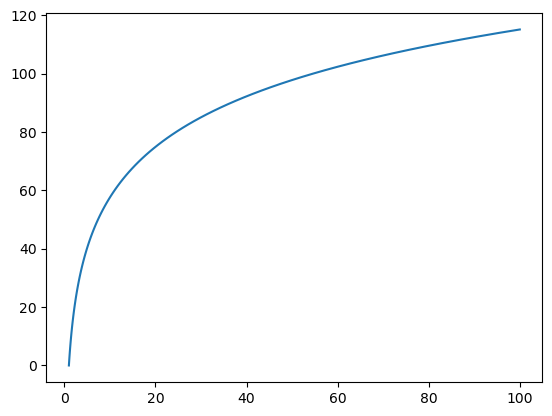

In [16]:
rps_carmen = np.geomspace(1, 100, 100)
exf_carmen = 1/rps_carmen
values_carmen = 25*np.log(rps_carmen)

plt.plot(rps_carmen, values_carmen)

In [17]:
exceedance_curves_carmen = [ExceedanceCurve(
    values=fac*np.log(rps_carmen),
    exceedance_frequencies=exf_carmen,
) for fac in [65, 75]] # left plot
# ) for fac in [25, 70]] # right plot

(1.0, 100.0)

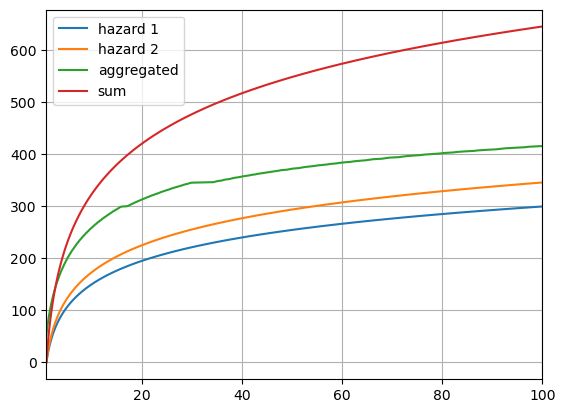

In [18]:
agg_curve_carmen = combine_exceedance_curves(
    exceedance_curves_carmen,
    value_resolution=1.,
    aggregation_method=sum,
    coincidence_fraction=1)

fig, ax = plt.subplots()
for i in [0,1]:
    ax.plot(1/exceedance_curves_carmen[i].exceedance_frequencies, exceedance_curves_carmen[i].values, label=f'hazard {i+1}')


ax.plot(1/agg_curve_carmen.exceedance_frequencies, agg_curve_carmen.values, label='aggregated')
ax.plot(1/exceedance_curves_carmen[0].exceedance_frequencies, np.sum([exceedance_curves_carmen[i].values for i in [0,1]], axis=0), label='sum')
ax.grid()
ax.legend()
ax.set_xlim(1, 100)

In [19]:
ef_test = rp_map.exceedance_curves[0].exceedance_frequencies[:]
# ef_test[0]=5.
ef_test

array([1.        , 0.86716244, 0.7519707 , 0.65208075, 0.56545994,
       0.49034562, 0.42520931, 0.36872554, 0.31974494, 0.2772708 ,
       0.24043883, 0.20849952, 0.18080295, 0.15678553, 0.13595852,
       0.11789813, 0.10223683, 0.08865594, 0.0768791 , 0.06666667])